In [12]:
import pandas as pd
import numpy as np
from sklearn.tree import export_text, DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("stress_detection.csv", index_col=0)
print(df)

                day  PSS_score  Openness  Conscientiousness  Extraversion  \
participant_id                                                              
1                 1         34  2.322732           4.332193      1.185878   
1                 2         37  1.761436           3.254120      3.907281   
1                 3         30  3.025887           1.855002      2.045900   
1                 4         16  1.948370           4.966676      3.345225   
1                 5         32  3.343484           2.065936      3.137843   
...             ...        ...       ...                ...           ...   
100              26         30  2.529821           2.339608      1.321208   
100              27         33  1.319100           4.500507      4.816983   
100              28         30  1.899102           3.930147      4.047799   
100              29         28  1.472408           1.712893      1.245082   
100              30         10  3.152789           3.633976      2.387994   

In [3]:
# Get unique participant IDs
unique_ids = df.index.unique()

# Shuffle the IDs
np.random.seed(0) # Not truly random!
shuffled_ids = np.random.permutation(unique_ids)

# Split the IDs
n_train = int(len(shuffled_ids) * 0.8)
n_val = int(len(shuffled_ids) * 0.1)
n_test = len(shuffled_ids) - n_train - n_val

train_ids = shuffled_ids[:n_train]
val_ids = shuffled_ids[n_train:n_train + n_val]
test_ids = shuffled_ids[n_train + n_val:]

# Filter rows by IDs
train_data = df[df.index.isin(train_ids)]
val_data = df[df.index.isin(val_ids)]
test_data = df[df.index.isin(test_ids)]

# Print sizes
print(f"Train size: {len(train_data)}")
print(f"Validation size: {len(val_data)}")
print(f"Test size: {len(test_data)}")

Train size: 2400
Validation size: 300
Test size: 300


In [8]:
X = train_data.drop("PSS_score", axis=1)
y = train_data.PSS_score

In [23]:
y.values

array([34, 37, 30, ..., 30, 28, 10], dtype=int64)

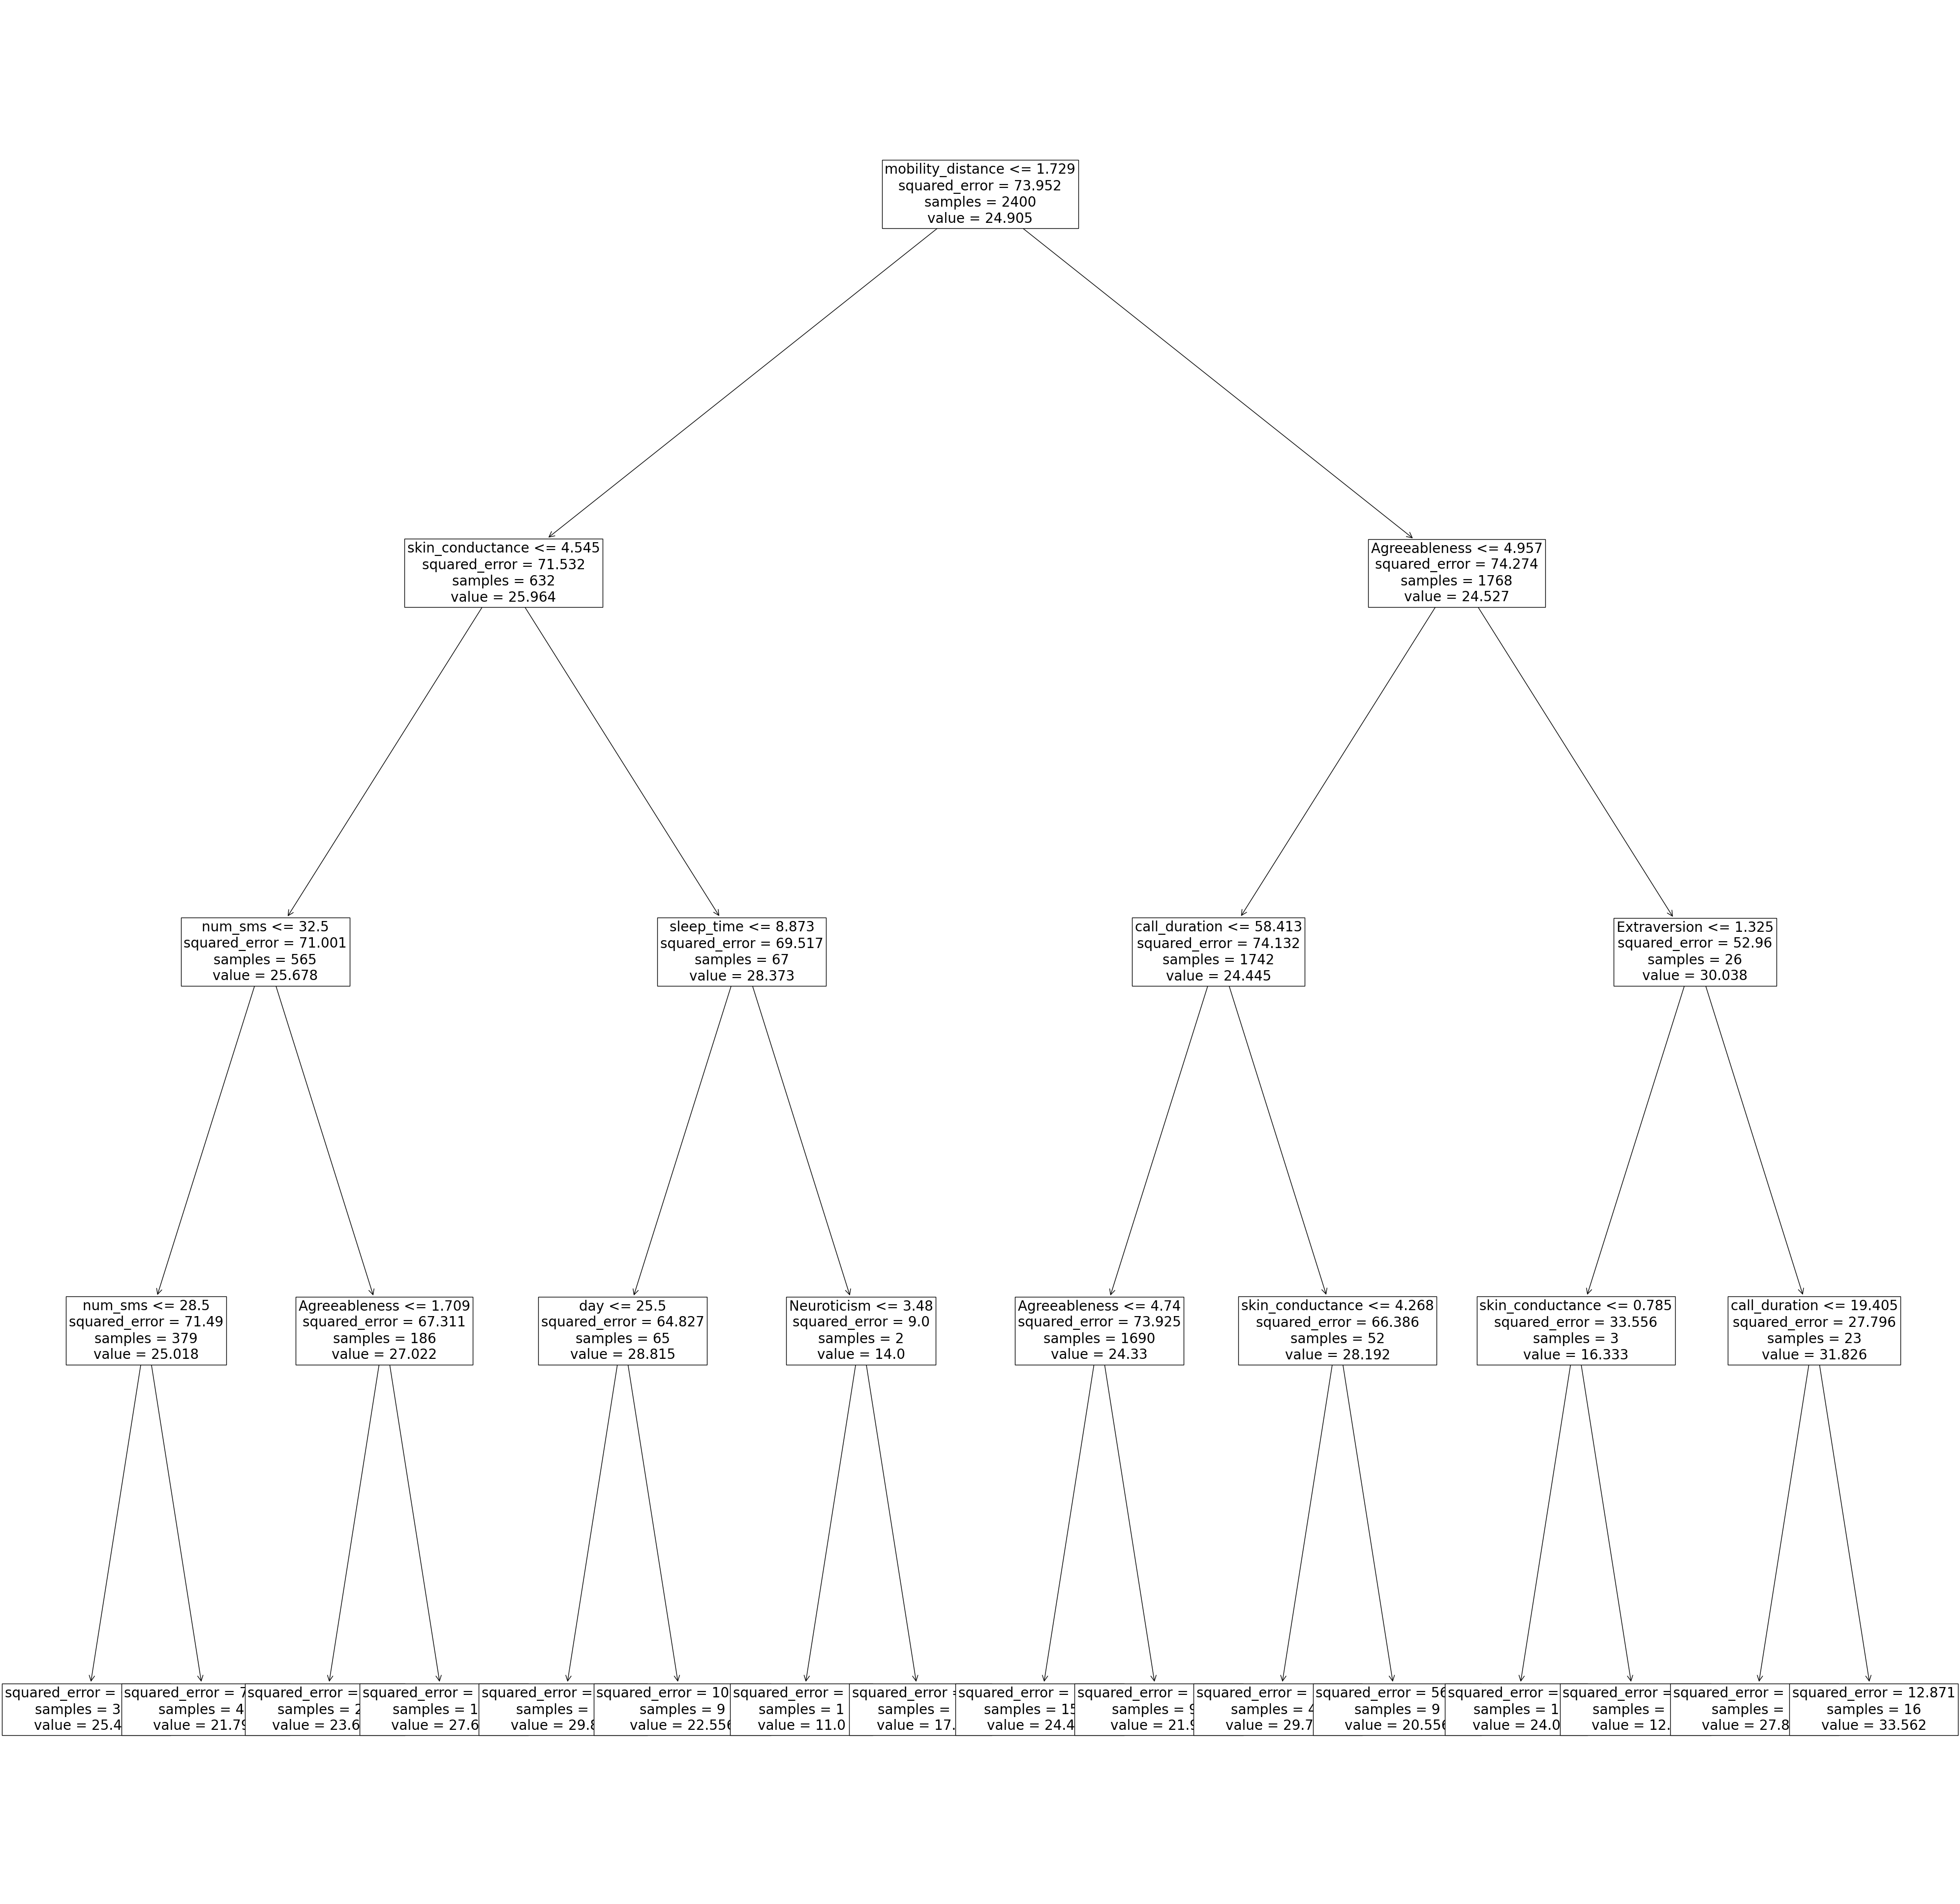

In [ ]:
model = DecisionTreeRegressor(criterion='squared_error', max_depth=4)
model.fit(X, y)
fig = plt.figure(figsize=(50, 50))
_ = tree.plot_tree(model, fontsize=20, feature_names=X.columns)
# print(export_text(model, feature_names=X.columns))

# Notes from prof:
# Check MSE train and MSE test against each other
# try min_impurity_decrease in regressor
# only show first 3 layers on slides and interpret them, bigger font (make readable)
# maybe decrease max_depth as last step